In [53]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Load the data set 
car_prices_data = Path("Data/clean_car_prices.zip")

# Read the car prices data and store into Pandas DataFrames
car_prices_df = pd.read_csv(car_prices_data)
car_prices_df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [54]:
## Question 1: How do sales differ by vehicle type? ##
# Part 1: Which vehicle type is most popular(like sedans, SUVs, trucks, electric vehicles)

# use group by to sperate the data by vehicle type,then calculate the total price of each group
vehicle_type = car_prices_df.groupby("body")["sellingprice"].sum()
vehicle_type

# The unique method shows every element only once
# unique = car_prices_df["body"].unique()
# unique 



body
Access Cab             3076900.0
Beetle Convertible      939650.0
CTS Coupe              2935850.0
CTS Wagon               231550.0
CTS-V Coupe            1075921.0
                         ...    
transit van             158950.0
tsx sport wagon         144950.0
van                    8555553.0
wagon                 26368462.0
xtracab                  21000.0
Name: sellingprice, Length: 87, dtype: float64

In [76]:
# most popular vehicle type
vehicle_type_max = vehicle_type.idxmax()
vehicle_type_max # Sedan


'Sedan'

In [79]:
# top 10 most popular vehicle type
print(vehicle_type.nlargest(10))

body
Sedan          2.312174e+09
SUV            1.897399e+09
sedan          5.154063e+08
suv            4.207786e+08
Crew Cab       2.834282e+08
Minivan        2.429321e+08
Coupe          2.225661e+08
Hatchback      2.147758e+08
SuperCrew      1.621879e+08
Convertible    1.483278e+08
Name: sellingprice, dtype: float64


In [75]:
# least popular vehicle type
vehicle_type_min = vehicle_type.idxmin()
vehicle_type_min 

'Ram Van'

In [80]:
# top 10 least popular vehicle type
print(vehicle_type.nsmallest(10))

body
Ram Van              1200.0
cab plus 4           6500.0
Cab Plus            11300.0
cts wagon           13750.0
g37 coupe           17300.0
xtracab             21000.0
Cab Plus 4          43400.0
CTS-V Wagon         50500.0
g37 convertible     84000.0
q60 coupe          124450.0
Name: sellingprice, dtype: float64


In [56]:
# part 2: Average price per type, expensive and cheapest vehicle type 
vehicle_type_mean = car_prices_df.groupby("body")["sellingprice"].mean()
vehicle_type_mean

# list them out from most expensive to cheapest (bar graph) 
vehicle_type_mean_sorted = vehicle_type_mean.sort_values(ascending=False)
vehicle_type_mean_sorted

body
granturismo convertible    79041.666667
GranTurismo Convertible    74000.000000
CTS-V Wagon                50500.000000
cts-v coupe                39707.142857
CTS-V Coupe                38425.750000
                               ...     
Xtracab                     5818.750000
xtracab                     5250.000000
Club Cab                    4650.064103
Cab Plus                    2825.000000
Ram Van                     1200.000000
Name: sellingprice, Length: 87, dtype: float64

In [57]:
# Print the first 10 most expensive vehicle types
print("Top 10 Most Expensive Vehicle Types:")
print(vehicle_type_mean_sorted.head(10))

# Print the 10 cheapest vehicle types
print("Top 10 Cheapest Vehicle Types:")
print(vehicle_type_mean_sorted.tail(10))

# Print a separator
print("\n" + "-"*40 + "\n")


Top 10 Most Expensive Vehicle Types:
body
granturismo convertible    79041.666667
GranTurismo Convertible    74000.000000
CTS-V Wagon                50500.000000
cts-v coupe                39707.142857
CTS-V Coupe                38425.750000
Q60 Convertible            36667.105263
q60 convertible            35725.000000
q60 coupe                  31112.500000
Q60 Coupe                  29479.687500
mega cab                   29055.769231
Name: sellingprice, dtype: float64
Top 10 Cheapest Vehicle Types:
body
King Cab      9201.846330
koup          9148.484848
Cab Plus 4    8680.000000
cab plus 4    6500.000000
club cab      6031.818182
Xtracab       5818.750000
xtracab       5250.000000
Club Cab      4650.064103
Cab Plus      2825.000000
Ram Van       1200.000000
Name: sellingprice, dtype: float64

----------------------------------------



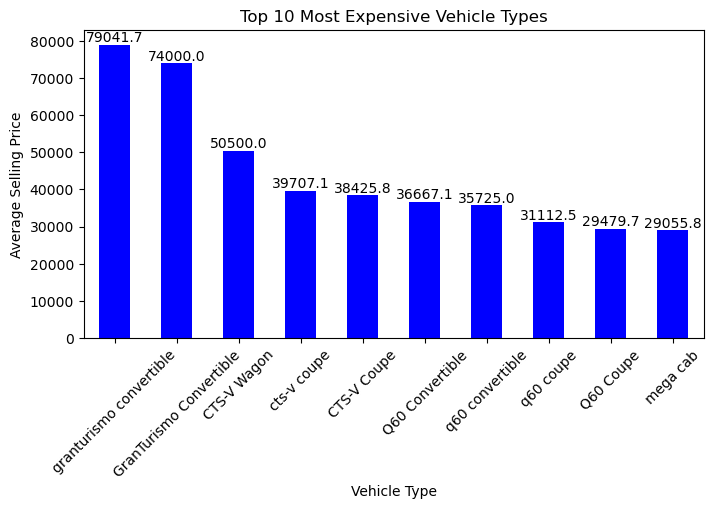

In [68]:
# visualization 
# Top 10 Most Expensive Vehicle Types
top_10_expensive = vehicle_type_mean_sorted.head(10)
top_10_expensive.plot(kind='bar', figsize=(8, 4), color='blue')
plt.title('Top 10 Most Expensive Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

for index, value in enumerate(top_10_expensive):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()

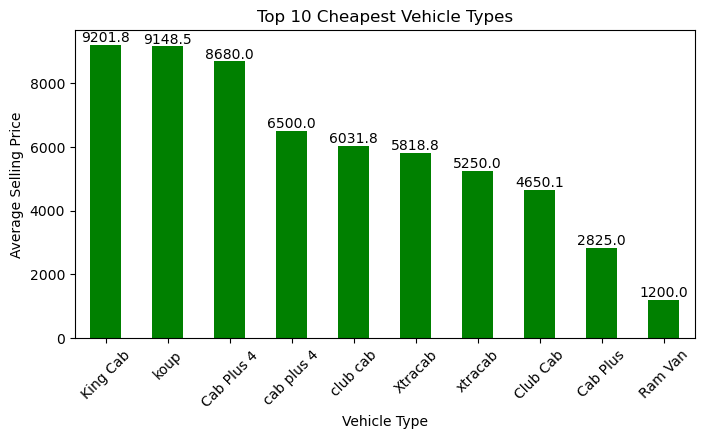

In [69]:
# Top 10 Cheapest Vehicle Types
top_10_cheapest = vehicle_type_mean_sorted.tail(10)
top_10_cheapest.plot(kind='bar', figsize=(8, 4), color='green')
plt.title('Top 10 Cheapest Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

for index, value in enumerate(top_10_cheapest):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom')
    
plt.show()